In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from mapchiral import mapchiral

from tqdm import tqdm
tqdm.pandas()

import tmap as tm
from faerun import Faerun

plt.rcParams['font.sans-serif'] = "Menlo"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 20})

#### Building Blocks

Import building blocks

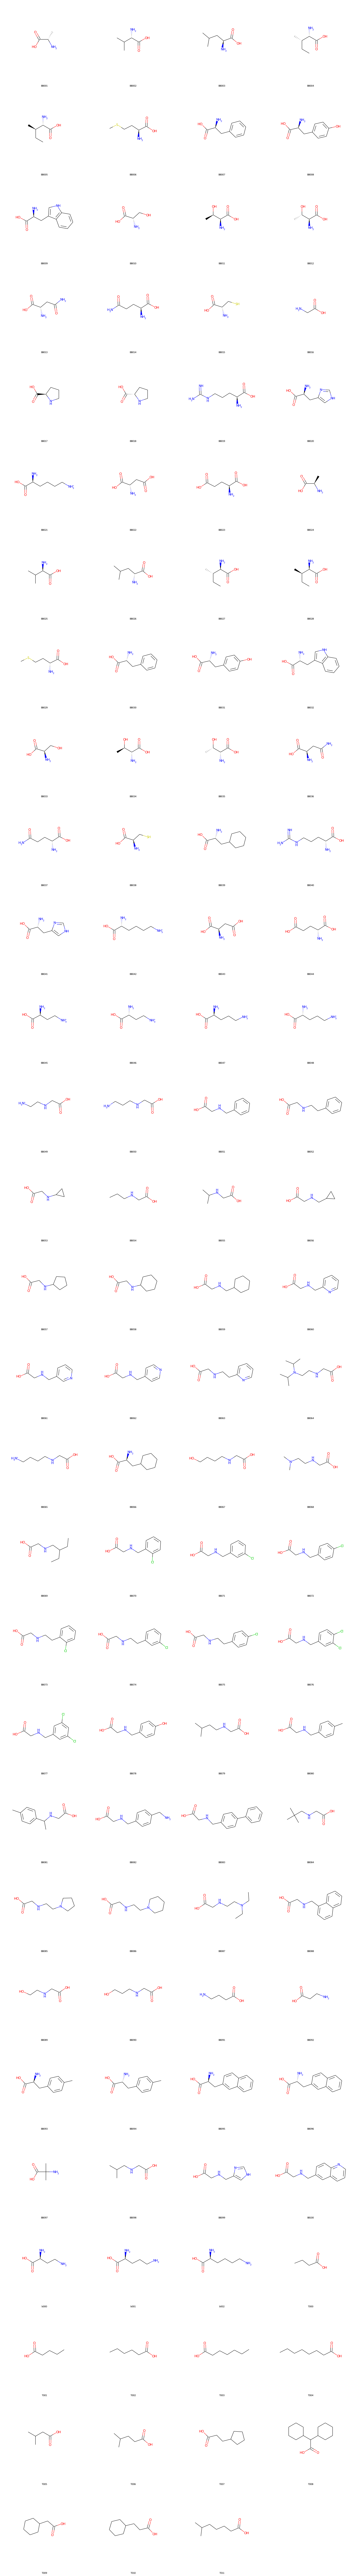

In [5]:
bb = pd.read_csv('pdga/BB/bb.csv')
branches = pd.read_csv('pdga/BB/branches.csv')
ncaps = pd.read_csv('pdga/BB/ncaps.csv')

branches['SMILES'] = branches['SMILES'].apply(lambda x: x.replace('8', '')) # Remove cyclization from branches

all = pd.concat([bb, branches, ncaps], ignore_index=True)
all['SMILES'] = all['SMILES'].apply(lambda x: x + 'O') # Add oxygen
all['mol'] = all['SMILES'].apply(Chem.MolFromSmiles)

Chem.Draw.MolsToGridImage(all['mol'], molsPerRow=4, subImgSize=(600, 600), legends=all['ID'].values.tolist(), maxMols=120)